In [14]:
import numpy as np
import scipy.stats as stats
def mh_student(nchain = 10**4, DoF = 4, prop_sd = 0.1, init = 0):
    chain = np.zeros(nchain + 1)
    chain[0] = init
    acc_rate = 0.0
    
    for i in range(nchain):
        prop = chain[i] + prop_sd * np.random.normal()
        
        acc_prob = stats.t.logpdf(prop, df = DoF) - stats.t.logpdf(chain[i], df = DoF)
        
        if np.log(np.random.uniform()) < acc_prob:
            acc_rate += 1
            chain[i+1] = prop
        else:
            chain[i+1] = chain[i]
    
    acc_rate /= nchain
    
    return chain, acc_rate


In [15]:
chain, acc_rate = mh_student()

In [16]:
acc_rate


0.9652

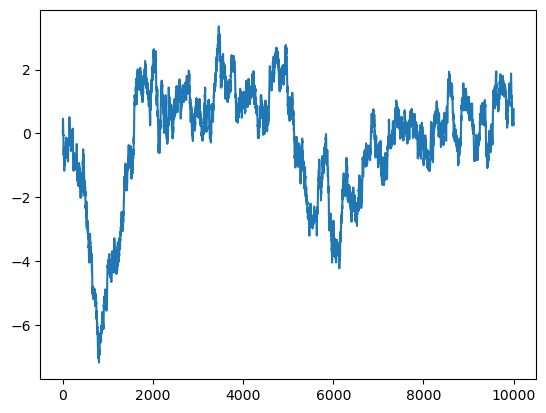

In [17]:

import matplotlib.pyplot as plt
plt.plot(chain)

0.5344


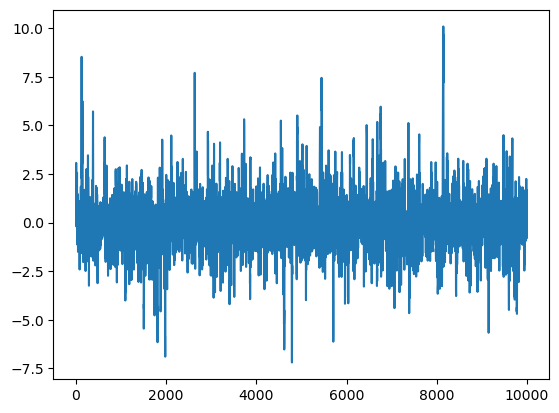

In [19]:
## Ma chaine ne mélange pas bien donc on va augmenter la variance de proposition
chain, acc_rate = mh_student(prop_sd=2)
print(acc_rate)
plt.plot(chain)

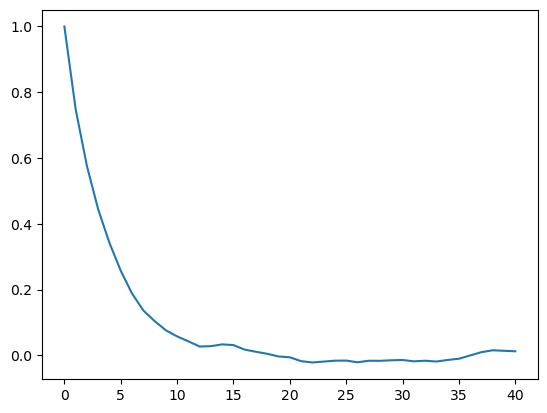

In [24]:
import statsmodels.tsa.stattools as stattools
plt.plot(stattools.acf(chain))